# Analyze data

# 1. Import

## 1.1 Packages

In [49]:
import pprint

import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
from pandas.plotting import autocorrelation_plot
from scipy import signal
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf


## 1.2 Options

In [50]:
pp = pprint.PrettyPrinter(indent=4)

## 1.3 Dataset

In [51]:
df = pd.read_parquet("../data/01_raw/stock_data_aapl.parquet")

# 2. Data

In [52]:
apple = yf.Ticker("AAPL")
# pp.pprint(apple.info)

In [53]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.716072,72.776598,71.466812,71.721019,135480400
2020-01-03,72.009132,72.771760,71.783977,71.941343,146322800
2020-01-06,72.582901,72.621639,70.876068,71.127858,118387200
2020-01-07,72.241539,72.849216,72.021223,72.592586,108872000
2020-01-08,73.403648,73.706279,71.943759,71.943759,132079200


<Axes: xlabel='Date'>

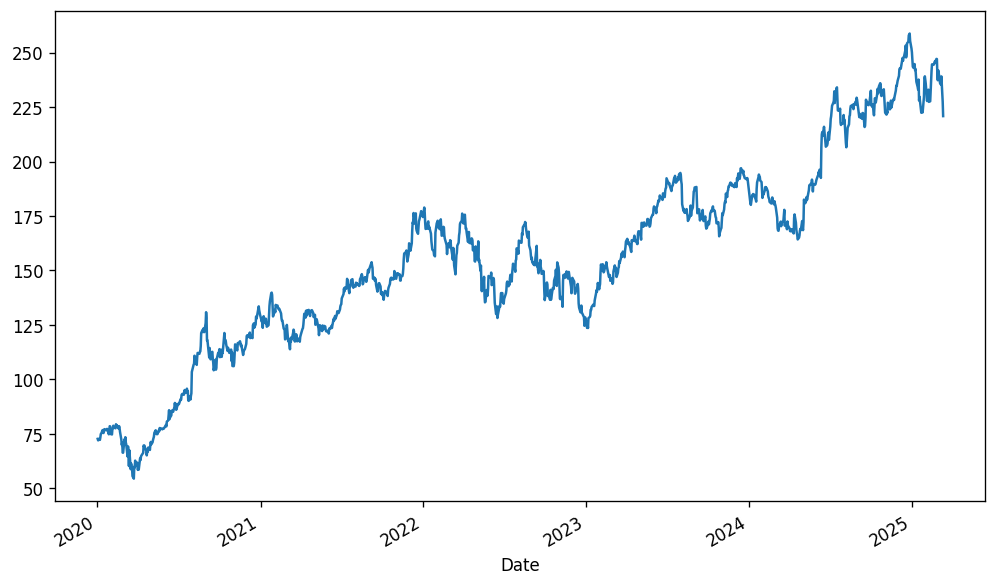

In [54]:
df["Close"]["AAPL"].plot()

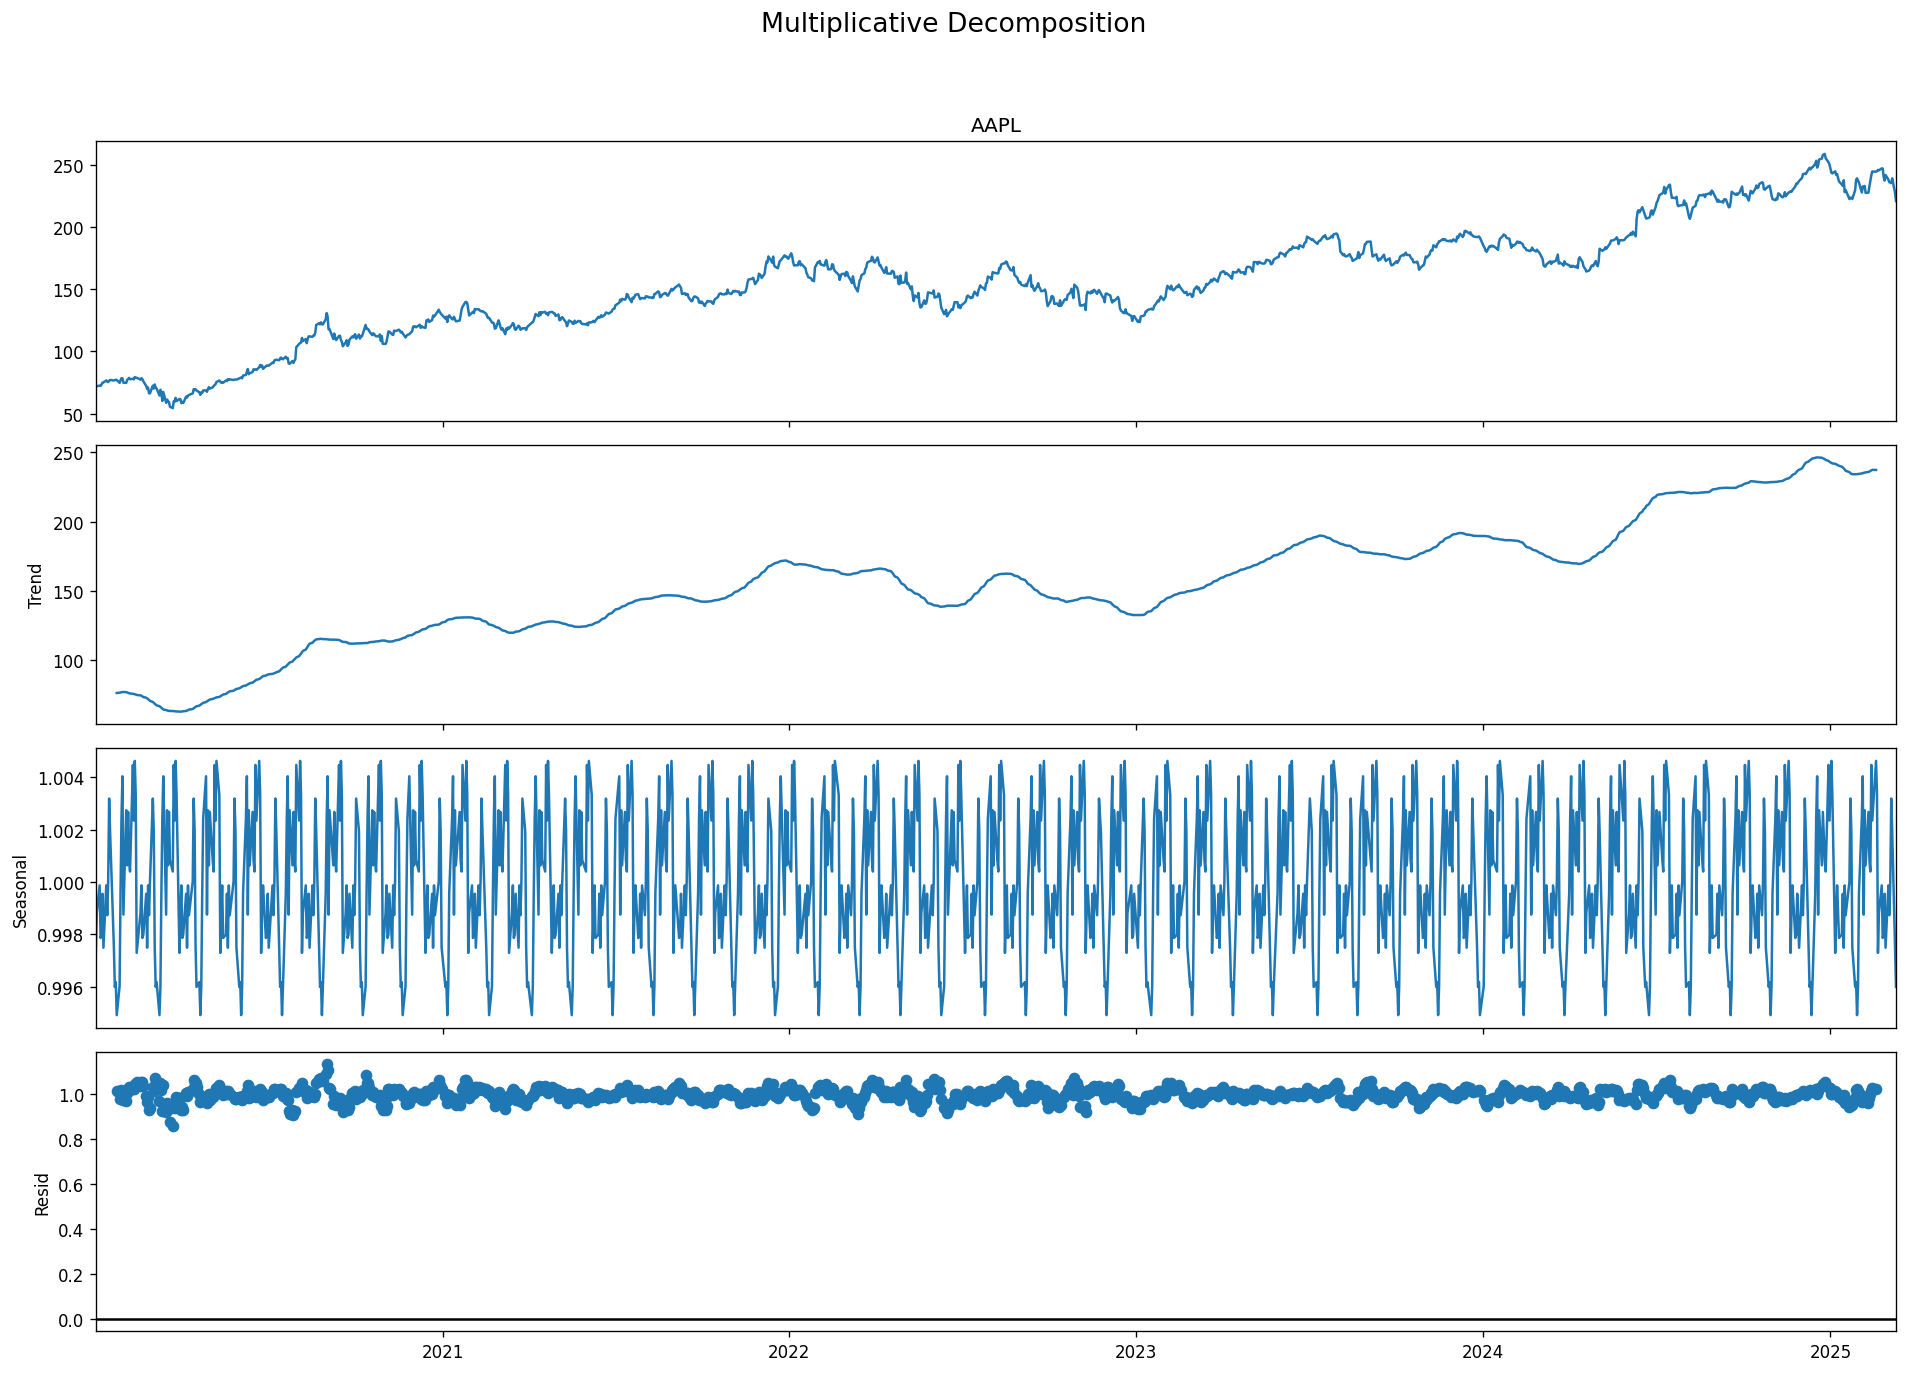

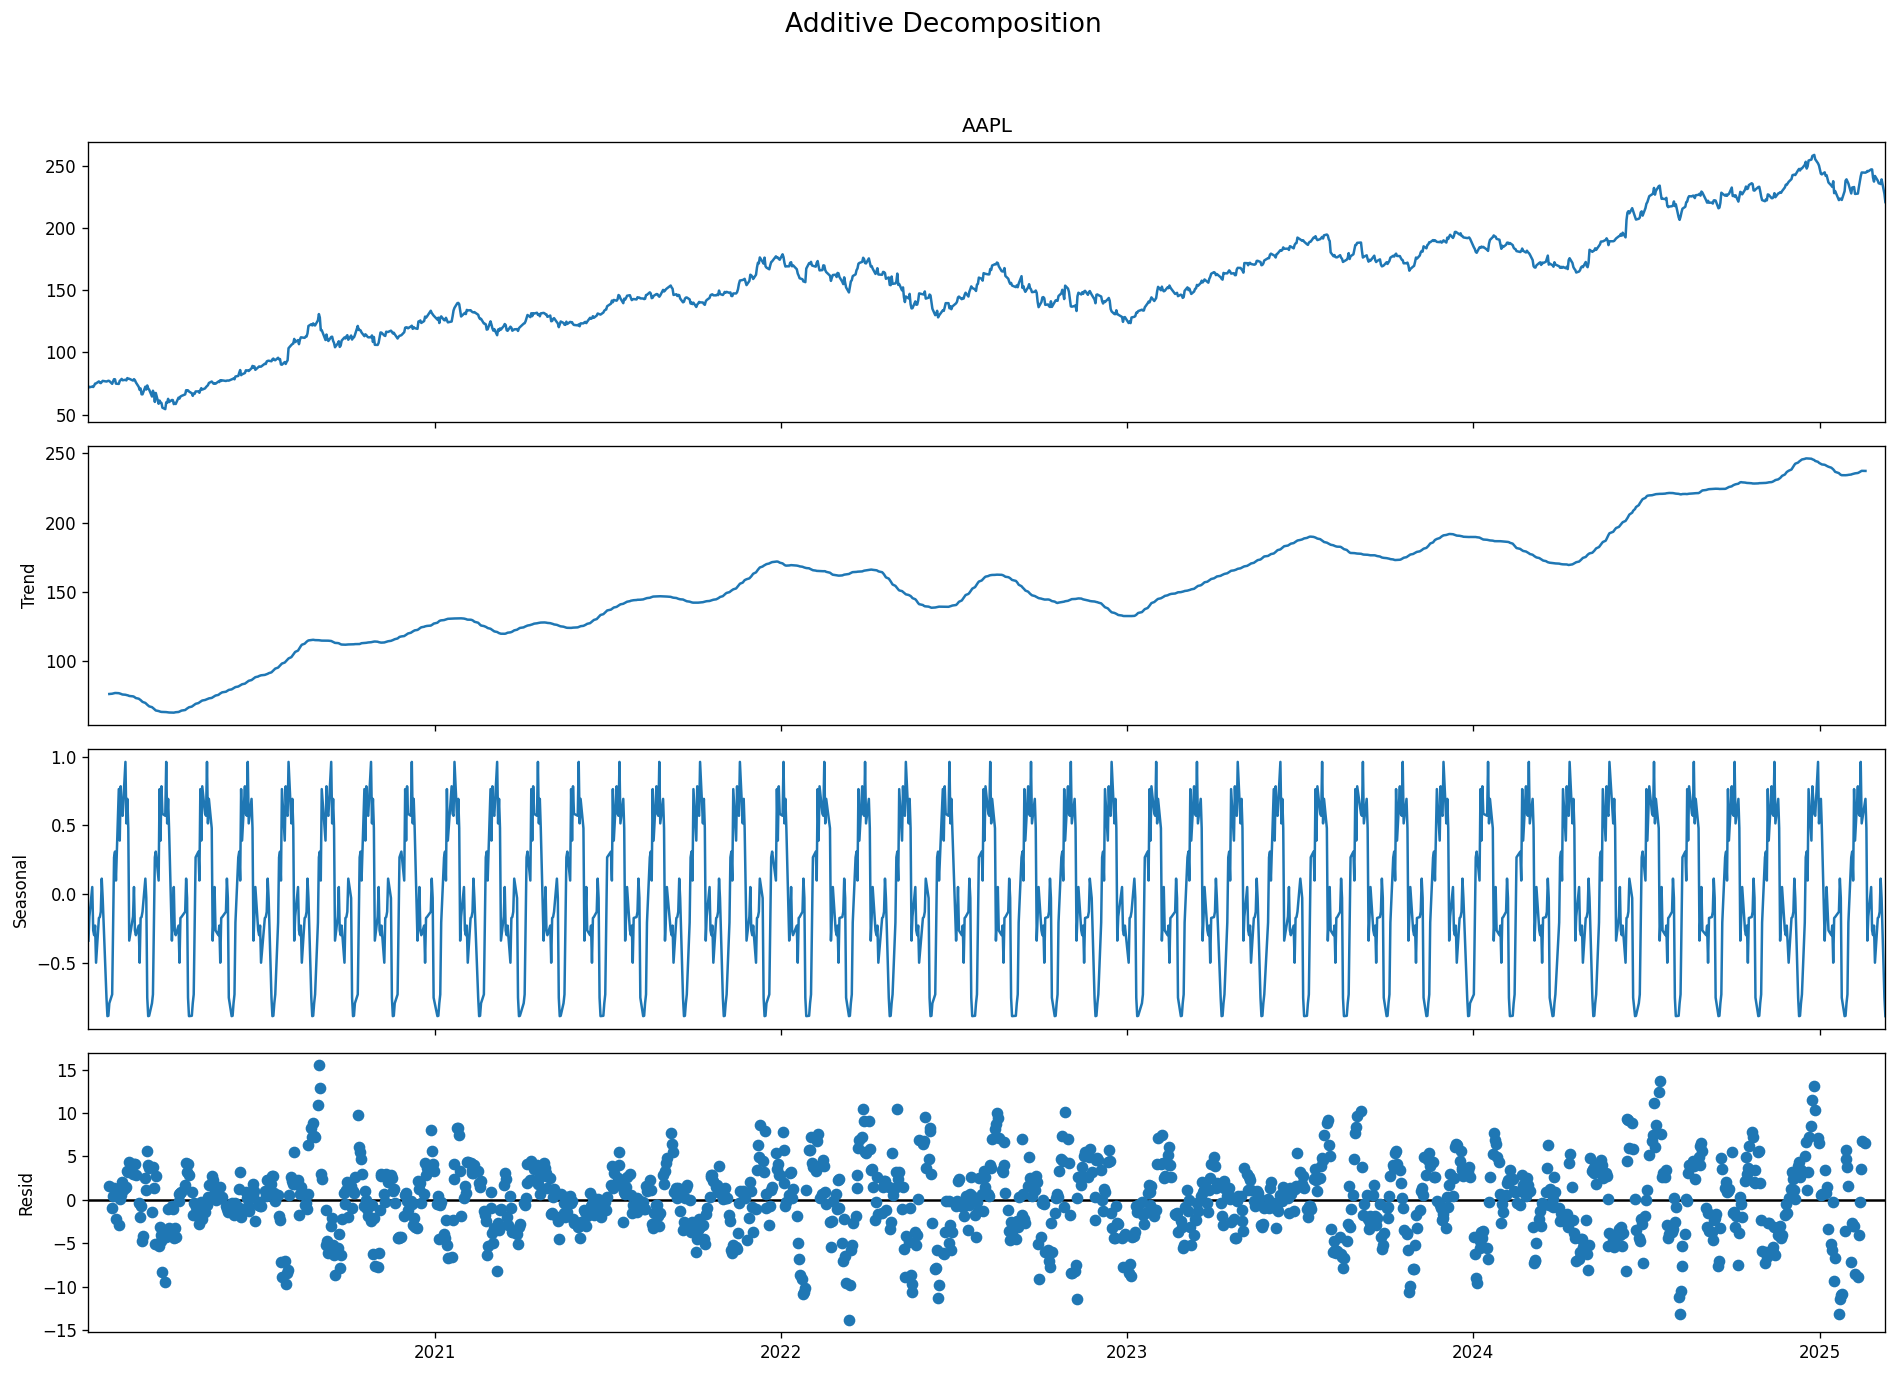

In [55]:

# Multiplicative Decomposition
multiplicative_decomposition = seasonal_decompose(df["Close"]["AAPL"], model='multiplicative', period=30)

# Additive Decomposition
additive_decomposition = seasonal_decompose(df["Close"]["AAPL"], model='additive', period=30)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

Text(0.5, 1.0, 'Apple stock at close detrended by subtracting the least squares fit')

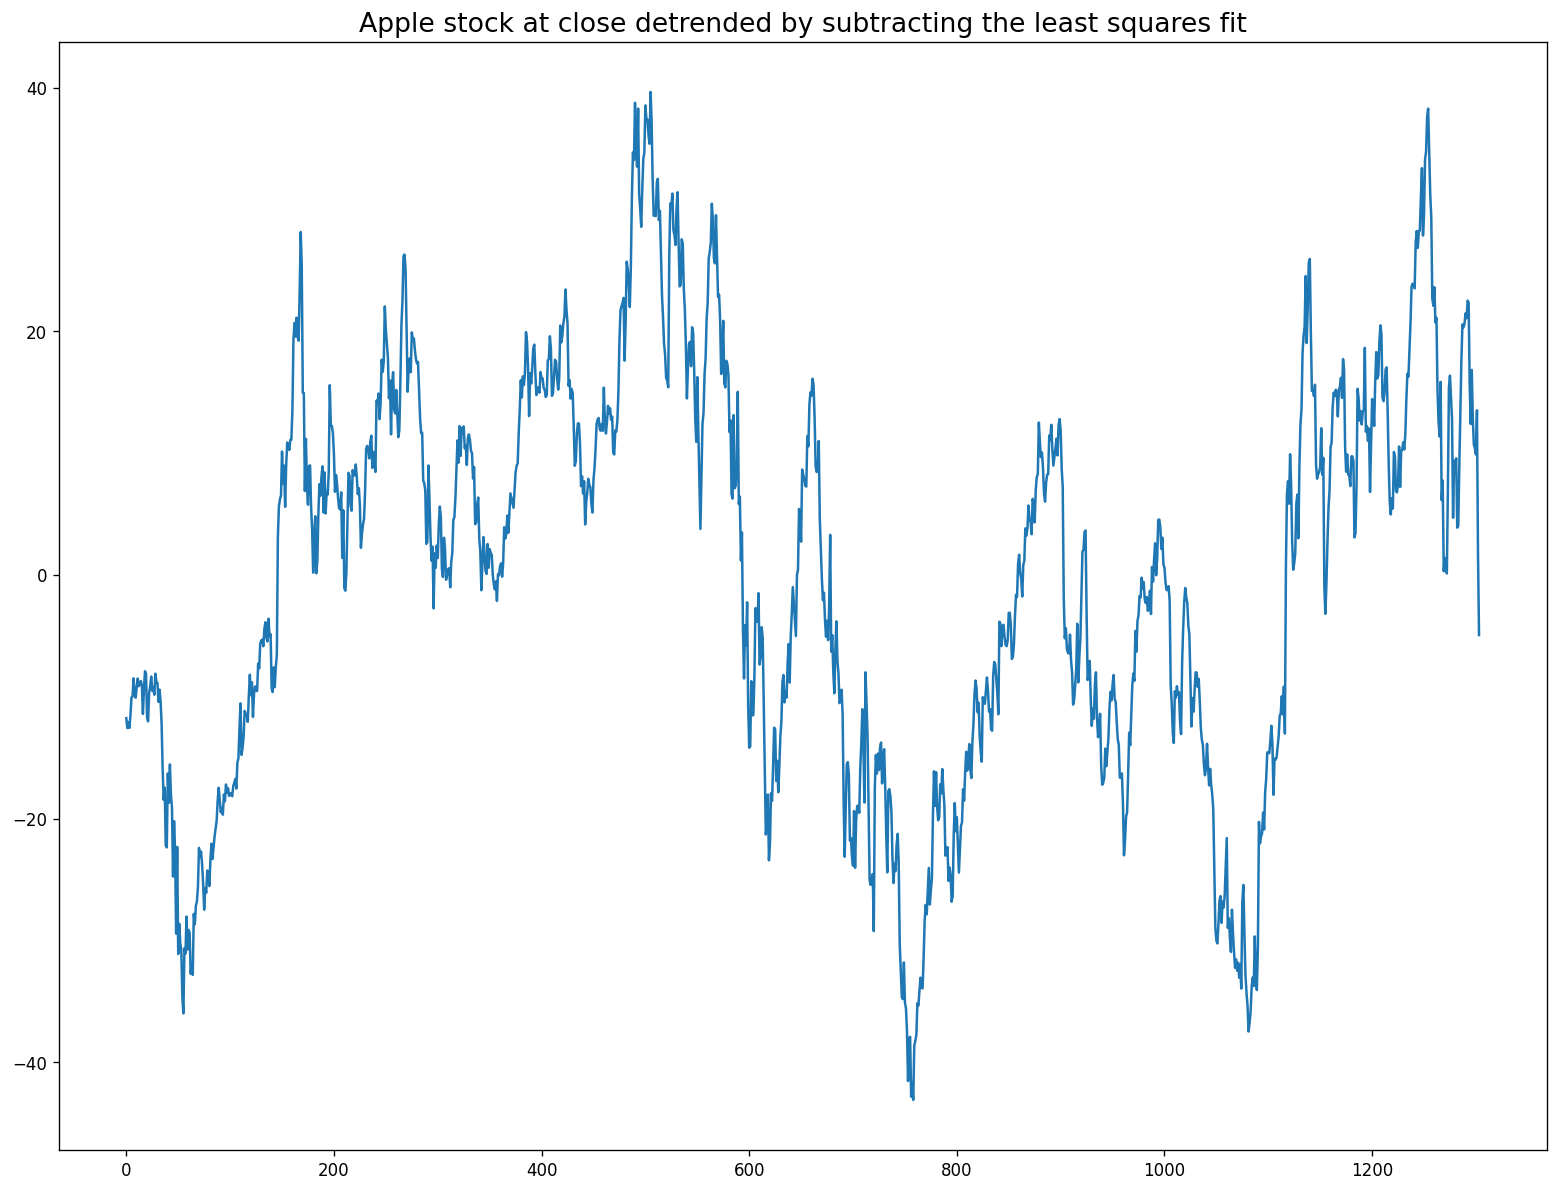

In [56]:
# Using scipy: Subtract the line of best fit
detrended = signal.detrend(df["Close"]["AAPL"].values)
plt.plot(detrended)
plt.title('Apple stock at close detrended by subtracting the least squares fit', fontsize=16)

Text(0.5, 1.0, 'Apple stock at close detrended by subtracting the trend component')

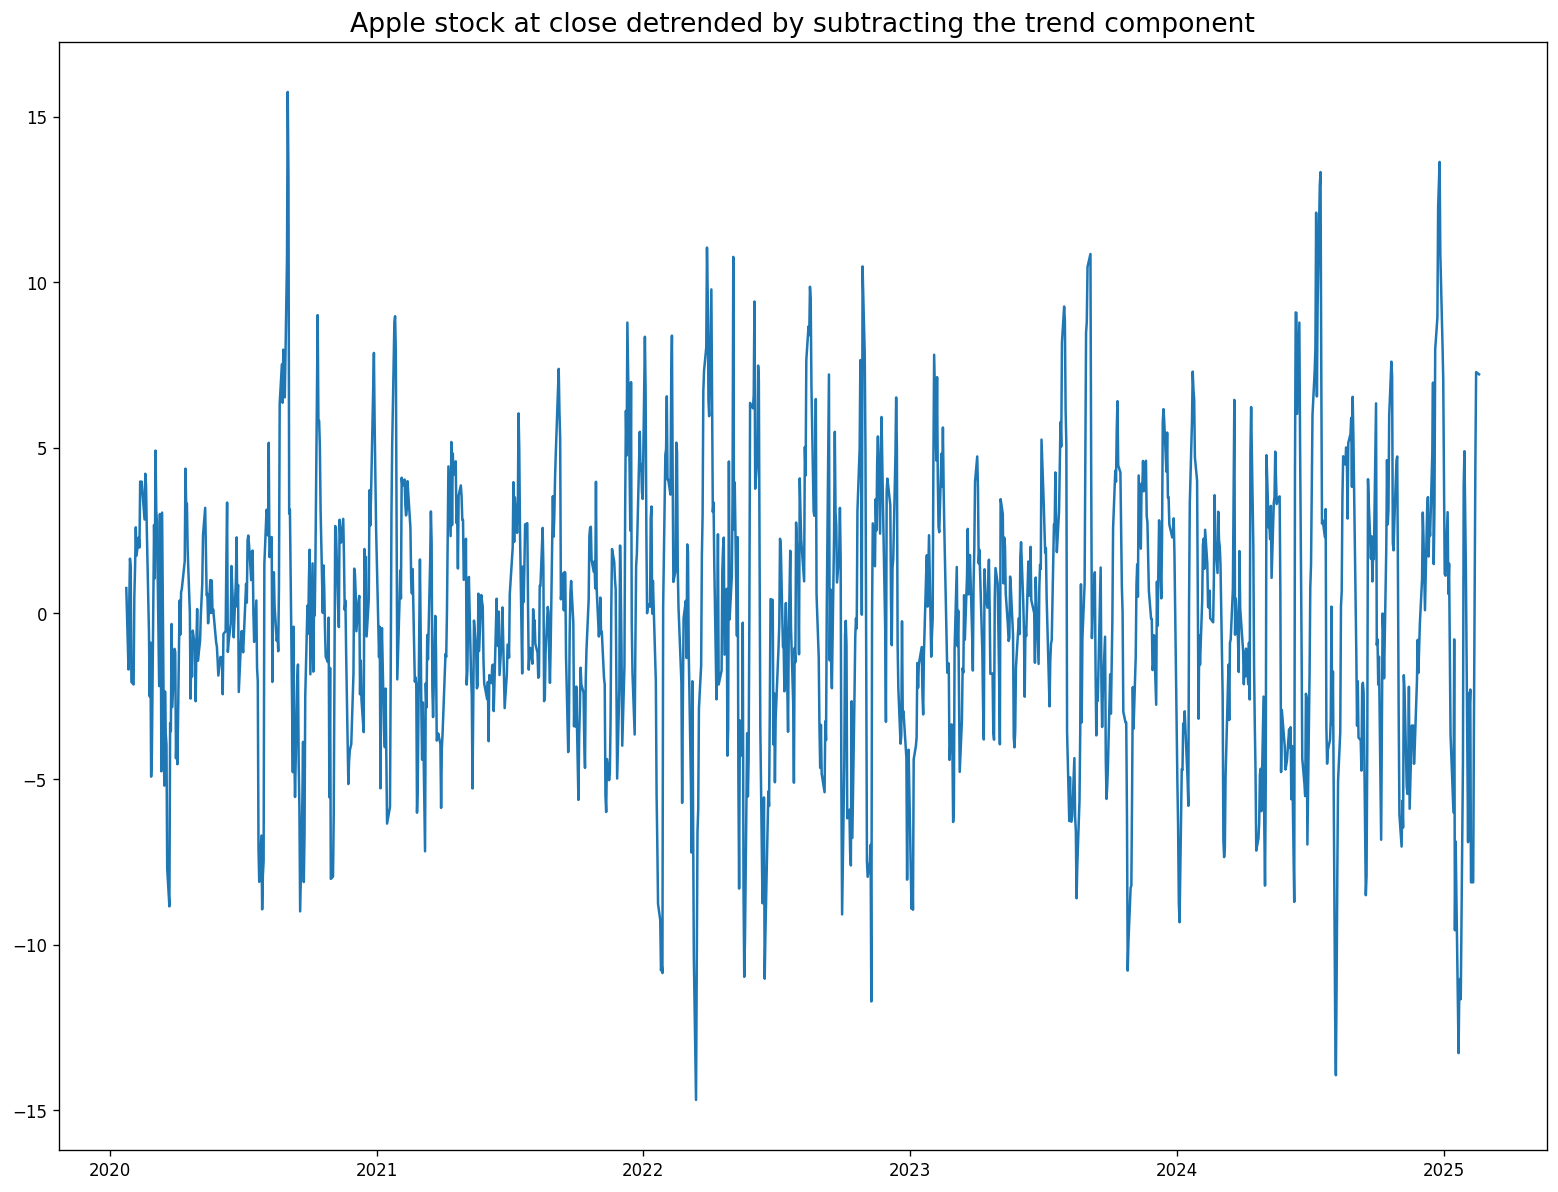

In [57]:
result_mul = seasonal_decompose(df["Close"]["AAPL"], model='multiplicative', period=30)
detrended = df["Close"]["AAPL"].values - result_mul.trend
plt.plot(detrended)
plt.title('Apple stock at close detrended by subtracting the trend component', fontsize=16)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

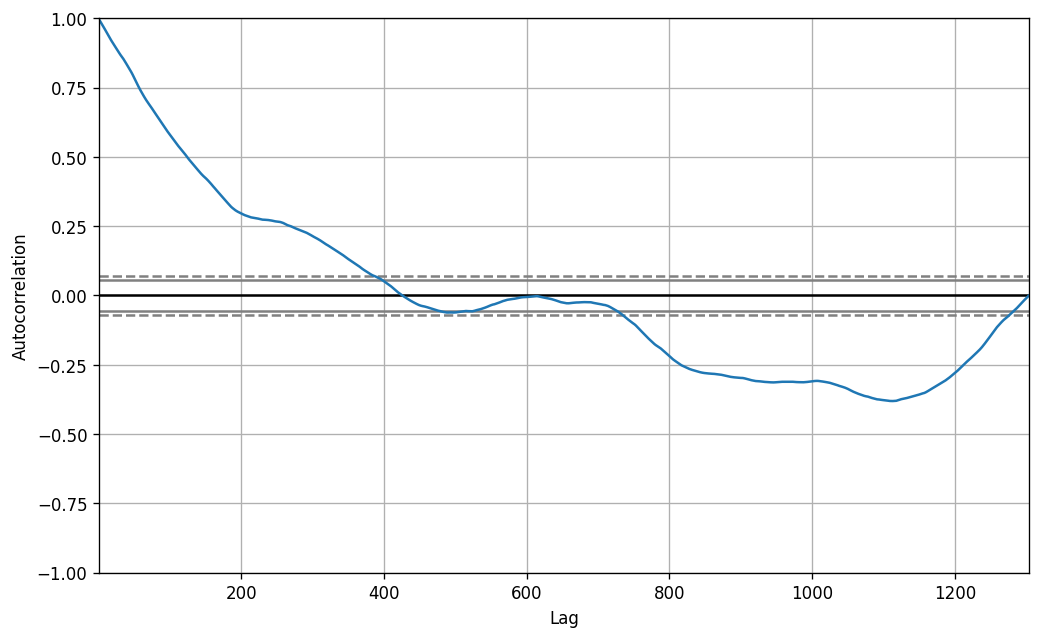

In [58]:
# Test for seasonality

# Draw Plot
plt.rcParams.update({'figure.figsize':(10,6), 'figure.dpi':120})
autocorrelation_plot(df["Close"]["AAPL"].tolist())

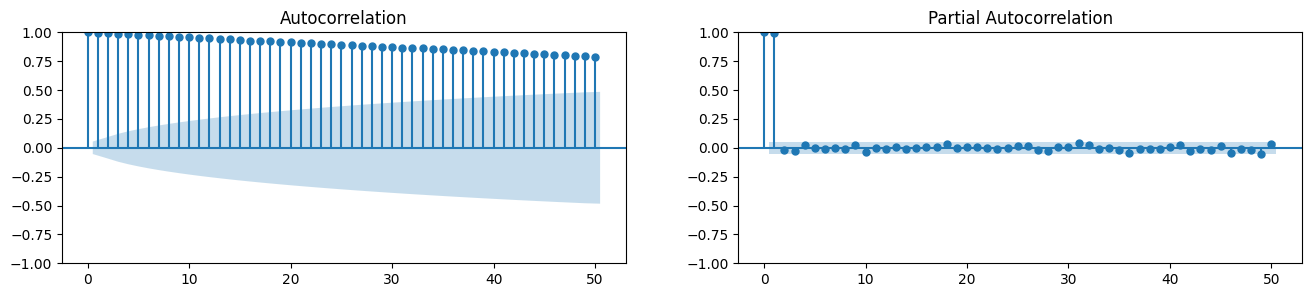

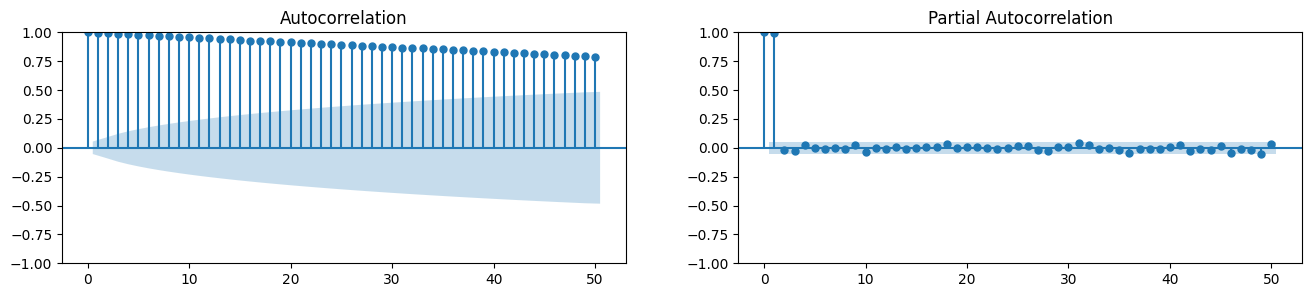

In [59]:
# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(df["Close"]["AAPL"].tolist(), lags=50, ax=axes[0])
plot_pacf(df["Close"]["AAPL"].tolist(), lags=50, ax=axes[1])